# 1. Data  
## 1.1 Role of data
Describe relationship between data <---> model, discussion about source, local,regional,global data, quality,etc 


## 1.2 Selected data
> explained the reasoning behind the selection of the time-series data we choose.


```{admonition} Berkeley Earth Global Temperature
:class: tip, dropdown

- Daily  average temperature observations
- Resolution 1° x  1°
- [Source](https://berkeleyearth.org/data/)
- [License](https://berkeleyearth.org/data/)
```
```{admonition} NOAA GHCN: Nenana 
:class: tip, dropdown

- NENANA MUNICIPAL AIRPORT, AK US (USW00026435)
    - Rainfall 
    - Snowfall
    - Snowdepth
- [Source](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND)
- [License]()
```

```{admonition} NOAA GHCN: Fairbanks
:class: tip, dropdown

- FAIRBANKS INTERNATIONAL AIRPORT, AK US (USW00026411)
    - Rainfall 
    - Snowfall
    - Snowdepth
    - Air temperature
    - Average wind speed

- [Source](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND)
- [License]()
```

```{admonition} USGS Water Data: Nenana
:class: tip, dropdown

- USGS 15515500 TANANA R AT NENANA AK
    - Mean water temperature
    - Mean discharge

- [Source](https://waterdata.usgs.gov/nwis/rt)
- [License]()
```

```{admonition} USGS Water Data: Fairbanks
:class: tip, dropdown

- USGS 15485500 Tanana R at Fairbanks AK
    - Mean water temperature
    - Mean discharge
- [Source](https://waterdata.usgs.gov/nwis/rt)
- [License]()
```

```{admonition} USGS Water Data: Fairbanks
:class: tip, dropdown

- USGS 15485500 Tanana R at Fairbanks AK
    - Mean water temperature
    - Mean discharge
- [Source](https://waterdata.usgs.gov/nwis/rt)
- [License]()
```
```{admonition} NERC-EDS  Global Cloud Coverage
:class: tip, dropdown

- Global Cloud coverga percentage 
- Resolution 2° x  2°
- [Source](https://catalogue.ceda.ac.uk/uuid/5fda109ab71947b6b7724077bf7eb753?search_url=%2F%253Fq%253DCRU%2BTS4.07%2BCloud%2BCover%2B%26results_per_page%253D20%26sort_by%253Drelevance%26objects_related_to_uuid%253D%26geo_option%253DTrue%26north_bound%253D%26west_bound%253D%26east_bound%253D%26south_bound%253D%26start_date%253D%26end_date%253D%26date_option%253Dpublication_date%26start_date_pub%253D%26end_date_pub%253D) accessed through [KNMI](https://climexp.knmi.nl/select.cgi?id=someone@somewhere&field=cru4_cld_10)
- [License]()
```
```{admonition} TEMIS Global Solar Surface Irradiance
:class: tip, dropdown

- Broadband Solar Surface Irradiance(0.2-4.0 micron)
- Resolution 2° x  2°
- [Source](https://www.temis.nl/fresco/) accessed through [KNMI](https://climexp.knmi.nl/select.cgi?id=someone@somewhere&field=fresco6_ssi)
- [License]()
```
```{admonition} USGS Glaciers Data: Gulkana
:class: tip, dropdown

- Gulkana weather station (USGS 15478038) 
    - Air Temperature 
    - Precipitation
    - Glacier-wide mass balance
- [Source](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND)
- [License]()
```

```{admonition} NOAA Global Indexes
:class: tip, dropdown
 
- ENSO-Southern oscillation index
- Pacific decadal oscillation index
- Artic oscillation
- [Source](https://www.ncei.noaa.gov/access/monitoring/products/)
- [License]()
```

```{admonition} Nenana Ice Classic
:class: tip, dropdown
 
- Ice thickness measurements
- Ice break up dates
```


> also, why are we even using dataframes instead of trusty ol'numpy arrays?
> how is the data that we choose? lets explore the df



> the 'sampling of each timeseries is very different
> mention what problems this might cause( put example of  naive NN implementation in other notebook)

> Solutions? Pandas.resampling? interpolation? data augmentation?


> lets take a closer look at each time-series




> we see the seasonality, we could compute the autocorrelation function and PSD but we have 'zero-clipping' ( we can directly see it in the  time-series plot and unusual density distribution - weighted towards zero) in quite a few of time-series so the result wont be very accurate( we need to treat each column independently and drop rows without data).

> Here we could also integrate the Extreme Value analysis section


In [1]:
from funciones import*
import pandas as pd
from importlib import reload

Data=pd.read_csv("../../Data/Time_series_DATA.txt",skiprows=149,index_col=0)
#Data=pd.read_csv('https://raw.githubusercontent.com/iceclassic/sandbox/main/Data/Time_series_DATA.txt',index_col=0,skiprows=149)
Data.index = Data.index.astype(str).str.split().str[0]
Data.index = pd.to_datetime(Data.index, format="%Y-%m-%d")

Data = Data[(Data.index.year >= 1915) & (Data.index.year < 2024)]
Data=Data.drop(columns=['Days since start of year','Days until break up','Predicted ice thickness [m]','Noisy predicted ice thickness [m]','IceThickness [cm]'])


In [4]:
explore_contents(Data)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40413 entries, 1915-01-01 to 2023-12-31
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Regional: Air temperature [C]                      38563 non-null  float64
 1   Nenana: Rainfall [mm]                              29516 non-null  float64
 2   Nenana: Snowfall [mm]                              19945 non-null  float64
 3   Nenana: Snow depth [mm]                            15984 non-null  float64
 4   Nenana: Mean water temperature [C]                 2418 non-null   float64
 5   Nenana: Mean Discharge [m3/s]                      22525 non-null  float64
 6   Nenana: Air temperature [C]                        31146 non-null  float64
 7   Fairbanks: Average wind speed [m/s]                9797 non-null   float64
 8   Fairbanks: Rainfall [mm]                           29586 non-null  fl

From  the output of the functions we can observe:
1. Different columns have different 'sampling frequencies' and span different intervals
    -> Possible problems?
    
    -> Possible solutions?
        -> Resampling
        -> Droppping columns
        -> Interpolation
        -> Data Augmentation

2. The data is not stationary, strong seasonlity
    -> Discuss source of this?
        -physics behing this harmonic oscilaltion, natral earth cycles
        -Do the global cycles affect all columns? and the same type, or some variables have a phase delay with the global(s) cycle(s)

    -> Solutions?
        - what if we compute autocorrleation and PSD and compare spectra
        - possible problems
            - in distribution we see 'zero clipping'  ( variabels that cannot have values or cannot be measure below zero)



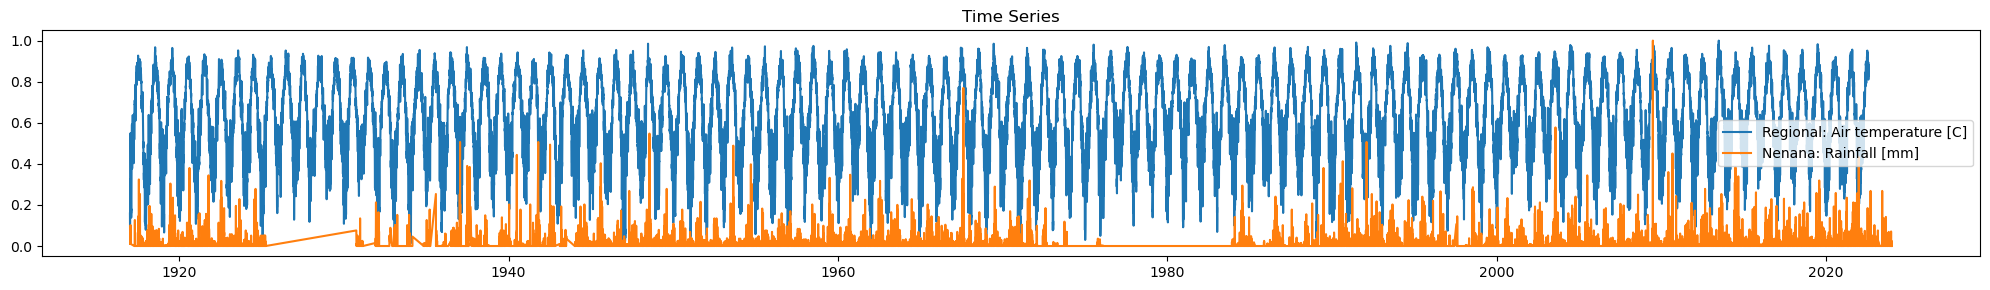

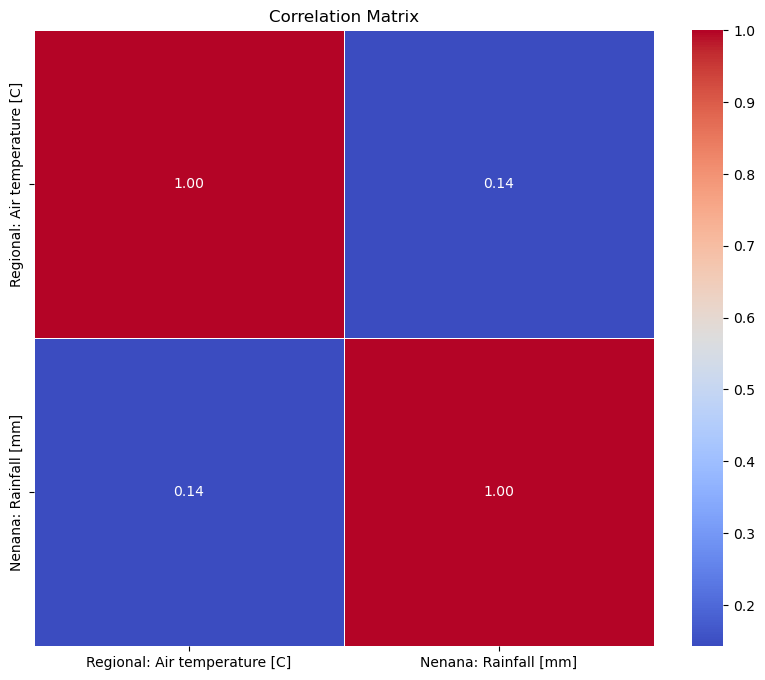

In [3]:
compare_columns(Data,cols=['Regional: Air temperature [C]','Nenana: Rainfall [mm]','Nenana: Air Temperature [C]'],norm_type='min_max')